In [1]:
!pip install pyti

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf

In [3]:
import pandas as pd
import numpy as np

In [4]:
import datetime

today = datetime.datetime.now()
DD = datetime.timedelta(days=59)
earlier = today - DD

In [5]:
data=yf.download("AAPL",earlier,today,interval="5m")

[*********************100%***********************]  1 of 1 completed


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-14 11:20:00-04:00,165.389999,165.479904,165.210007,165.294998,165.294998,0
2023-04-14 11:25:00-04:00,165.294998,165.294998,165.014999,165.028107,165.028107,319037
2023-04-14 11:30:00-04:00,165.029999,165.104996,164.889999,165.024994,165.024994,310137
2023-04-14 11:35:00-04:00,165.029999,165.059998,164.669998,164.705002,164.705002,306514
2023-04-14 11:40:00-04:00,164.699997,164.899994,164.679993,164.850006,164.850006,256724
...,...,...,...,...,...,...
2023-06-09 15:35:00-04:00,181.479996,181.490005,181.169998,181.399994,181.399994,680149
2023-06-09 15:40:00-04:00,181.399902,181.410004,181.029999,181.039993,181.039993,573312
2023-06-09 15:45:00-04:00,181.048294,181.259995,181.020004,181.225006,181.225006,643511


In [7]:
df=data.reset_index()

In [8]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-04-14 11:20:00-04:00,165.389999,165.479904,165.210007,165.294998,165.294998,0
1,2023-04-14 11:25:00-04:00,165.294998,165.294998,165.014999,165.028107,165.028107,319037
2,2023-04-14 11:30:00-04:00,165.029999,165.104996,164.889999,165.024994,165.024994,310137
3,2023-04-14 11:35:00-04:00,165.029999,165.059998,164.669998,164.705002,164.705002,306514
4,2023-04-14 11:40:00-04:00,164.699997,164.899994,164.679993,164.850006,164.850006,256724


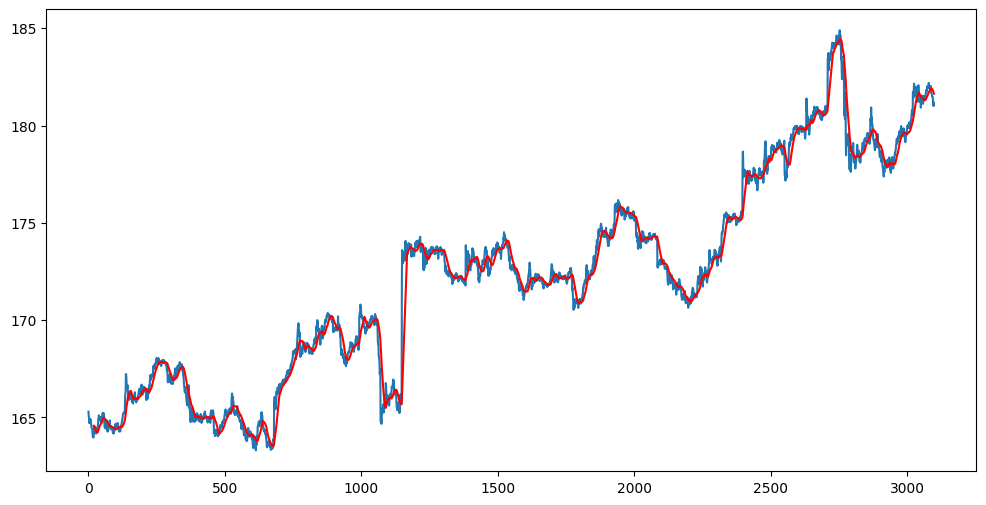

In [9]:
#100 day Moving average
import matplotlib.pyplot as plt

ma20=df.Close.rolling(20).mean()
ma20

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma20,"red")

In [10]:
df["20_MA"]=ma20
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,20_MA
0,2023-04-14 11:20:00-04:00,165.389999,165.479904,165.210007,165.294998,165.294998,0,NaN
1,2023-04-14 11:25:00-04:00,165.294998,165.294998,165.014999,165.028107,165.028107,319037,NaN
2,2023-04-14 11:30:00-04:00,165.029999,165.104996,164.889999,165.024994,165.024994,310137,NaN
3,2023-04-14 11:35:00-04:00,165.029999,165.059998,164.669998,164.705002,164.705002,306514,NaN
4,2023-04-14 11:40:00-04:00,164.699997,164.899994,164.679993,164.850006,164.850006,256724,NaN
...,...,...,...,...,...,...,...,...
3093,2023-06-09 15:35:00-04:00,181.479996,181.490005,181.169998,181.399994,181.399994,680149,181.812078
3094,2023-06-09 15:40:00-04:00,181.399902,181.410004,181.029999,181.039993,181.039993,573312,181.767633
3095,2023-06-09 15:45:00-04:00,181.048294,181.259995,181.020004,181.225006,181.225006,643511,181.732883
3096,2023-06-09 15:50:00-04:00,181.229996,181.229996,181.000000,181.000000,181.000000,941672,181.683383


In [11]:
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [12]:
df["RSI"]=rsi(df)

In [13]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,20_MA,RSI
0,2023-04-14 11:20:00-04:00,165.389999,165.479904,165.210007,165.294998,165.294998,0,NaN,NaN
1,2023-04-14 11:25:00-04:00,165.294998,165.294998,165.014999,165.028107,165.028107,319037,NaN,NaN
2,2023-04-14 11:30:00-04:00,165.029999,165.104996,164.889999,165.024994,165.024994,310137,NaN,NaN
3,2023-04-14 11:35:00-04:00,165.029999,165.059998,164.669998,164.705002,164.705002,306514,NaN,NaN
4,2023-04-14 11:40:00-04:00,164.699997,164.899994,164.679993,164.850006,164.850006,256724,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3093,2023-06-09 15:35:00-04:00,181.479996,181.490005,181.169998,181.399994,181.399994,680149,181.812078,38.419536
3094,2023-06-09 15:40:00-04:00,181.399902,181.410004,181.029999,181.039993,181.039993,573312,181.767633,29.869993
3095,2023-06-09 15:45:00-04:00,181.048294,181.259995,181.020004,181.225006,181.225006,643511,181.732883,37.560161
3096,2023-06-09 15:50:00-04:00,181.229996,181.229996,181.000000,181.000000,181.000000,941672,181.683383,32.843273


In [14]:
from pyti.money_flow_index import money_flow_index as mfin

mfi=mfin(close_data=df.Close,high_data=df.High,low_data=df.Low,volume=df.Volume,period=14)
df["MFI"]=mfi

In [15]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,20_MA,RSI,MFI
0,2023-04-14 11:20:00-04:00,165.389999,165.479904,165.210007,165.294998,165.294998,0,NaN,NaN,NaN
1,2023-04-14 11:25:00-04:00,165.294998,165.294998,165.014999,165.028107,165.028107,319037,NaN,NaN,NaN
2,2023-04-14 11:30:00-04:00,165.029999,165.104996,164.889999,165.024994,165.024994,310137,NaN,NaN,NaN
3,2023-04-14 11:35:00-04:00,165.029999,165.059998,164.669998,164.705002,164.705002,306514,NaN,NaN,NaN
4,2023-04-14 11:40:00-04:00,164.699997,164.899994,164.679993,164.850006,164.850006,256724,NaN,NaN,NaN


In [16]:
from pyti.volume_adjusted_moving_average import volume_adjusted_moving_average as vwma

vawa=vwma(close_data=df.Close,volume=df.Volume,period=14)
df["VWMA"]=vawa
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,20_MA,RSI,MFI,VWMA
0,2023-04-14 11:20:00-04:00,165.389999,165.479904,165.210007,165.294998,165.294998,0,NaN,NaN,NaN,NaN
1,2023-04-14 11:25:00-04:00,165.294998,165.294998,165.014999,165.028107,165.028107,319037,NaN,NaN,NaN,NaN
2,2023-04-14 11:30:00-04:00,165.029999,165.104996,164.889999,165.024994,165.024994,310137,NaN,NaN,NaN,NaN
3,2023-04-14 11:35:00-04:00,165.029999,165.059998,164.669998,164.705002,164.705002,306514,NaN,NaN,NaN,NaN
4,2023-04-14 11:40:00-04:00,164.699997,164.899994,164.679993,164.850006,164.850006,256724,NaN,NaN,NaN,NaN


In [17]:
from pyti.average_true_range_percent import average_true_range_percent as atr

df["ATR"]=atr(close_data=df.Close,period=20)
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,20_MA,RSI,MFI,VWMA,ATR
0,2023-04-14 11:20:00-04:00,165.389999,165.479904,165.210007,165.294998,165.294998,0,NaN,NaN,NaN,NaN,NaN
1,2023-04-14 11:25:00-04:00,165.294998,165.294998,165.014999,165.028107,165.028107,319037,NaN,NaN,NaN,NaN,NaN
2,2023-04-14 11:30:00-04:00,165.029999,165.104996,164.889999,165.024994,165.024994,310137,NaN,NaN,NaN,NaN,NaN
3,2023-04-14 11:35:00-04:00,165.029999,165.059998,164.669998,164.705002,164.705002,306514,NaN,NaN,NaN,NaN,NaN
4,2023-04-14 11:40:00-04:00,164.699997,164.899994,164.679993,164.850006,164.850006,256724,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3093,2023-06-09 15:35:00-04:00,181.479996,181.490005,181.169998,181.399994,181.399994,680149,181.812078,38.419536,27.574431,178.271428,0.450958
3094,2023-06-09 15:40:00-04:00,181.399902,181.410004,181.029999,181.039993,181.039993,573312,181.767633,29.869993,26.045027,184.693974,0.461024
3095,2023-06-09 15:45:00-04:00,181.048294,181.259995,181.020004,181.225006,181.225006,643511,181.732883,37.560161,34.923025,196.388344,0.469254
3096,2023-06-09 15:50:00-04:00,181.229996,181.229996,181.000000,181.000000,181.000000,941672,181.683383,32.843273,32.844745,216.626999,0.479218


In [18]:
from pyti.commodity_channel_index import commodity_channel_index as cci

df["CCI"]=cci(close_data=df.Close,high_data=df.High,low_data=df.Low,period=14)

In [19]:
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume,20_MA,RSI,MFI,VWMA,ATR,CCI
3093,2023-06-09 15:35:00-04:00,181.479996,181.490005,181.169998,181.399994,181.399994,680149,181.812078,38.419536,27.574431,178.271428,0.450958,-5.950107
3094,2023-06-09 15:40:00-04:00,181.399902,181.410004,181.029999,181.039993,181.039993,573312,181.767633,29.869993,26.045027,184.693974,0.461024,-8.124545
3095,2023-06-09 15:45:00-04:00,181.048294,181.259995,181.020004,181.225006,181.225006,643511,181.732883,37.560161,34.923025,196.388344,0.469254,-7.181072
3096,2023-06-09 15:50:00-04:00,181.229996,181.229996,181.000000,181.000000,181.000000,941672,181.683383,32.843273,32.844745,216.626999,0.479218,-7.702725
3097,2023-06-09 15:55:00-04:00,180.994995,181.070007,180.729996,181.039993,181.039993,2354949,181.638883,34.419718,29.774353,279.596973,0.488023,-8.755522


In [20]:
df.High.values.max()

184.9510040283203

In [21]:
from pyti.standard_deviation import standard_deviation as std

df["STD"]=std(data=df.Close,period=25)
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,20_MA,RSI,MFI,VWMA,ATR,CCI,STD
0,2023-04-14 11:20:00-04:00,165.389999,165.479904,165.210007,165.294998,165.294998,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-14 11:25:00-04:00,165.294998,165.294998,165.014999,165.028107,165.028107,319037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-14 11:30:00-04:00,165.029999,165.104996,164.889999,165.024994,165.024994,310137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-14 11:35:00-04:00,165.029999,165.059998,164.669998,164.705002,164.705002,306514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-14 11:40:00-04:00,164.699997,164.899994,164.679993,164.850006,164.850006,256724,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,20_MA,RSI,MFI,VWMA,ATR,CCI,STD
count,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3.098000e+03,3079.000000,3084.000000,3084.000000,3085.000000,3079.000000,3085.000000,3074.000000
mean,172.175999,172.313525,172.036140,172.179056,172.179056,6.126173e+05,172.173273,51.646675,52.431549,258.041680,0.651269,0.546477,0.377598
std,5.253974,5.264784,5.240550,5.252368,5.252368,6.167235e+05,5.207634,12.114314,16.237696,164.293611,0.313364,7.741303,0.355108
min,163.054993,163.494400,162.800003,163.310593,163.310593,0.000000e+00,163.542286,11.087466,8.288444,83.200728,0.262657,-54.402361,0.074404
25%,167.661251,167.742504,167.563747,167.664547,167.664547,3.307830e+05,167.641590,43.557180,40.637964,156.278329,0.479405,-2.802168,0.196353
50%,172.289993,172.399948,172.169998,172.282700,172.282700,4.445445e+05,172.229745,51.713108,52.110972,197.302455,0.582313,0.453007,0.290345
75%,175.389999,175.490005,175.259972,175.380005,175.380005,6.590172e+05,175.308403,59.885925,64.072090,314.550096,0.727707,3.677580,0.438775
max,184.893097,184.951004,184.750000,184.895004,184.895004,1.062132e+07,184.439171,92.468924,94.839382,1373.663557,3.247975,101.698971,3.838494


In [23]:
df=df.drop("Datetime",axis="columns")
df.head()

,Open,High,Low,Close,Adj Close,Volume,20_MA,RSI,MFI,VWMA,ATR,CCI,STD
0,165.389999,165.479904,165.210007,165.294998,165.294998,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,165.294998,165.294998,165.014999,165.028107,165.028107,319037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,165.029999,165.104996,164.889999,165.024994,165.024994,310137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,165.029999,165.059998,164.669998,164.705002,164.705002,306514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,164.699997,164.899994,164.679993,164.850006,164.850006,256724,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
20_MA        19
RSI          14
MFI          14
VWMA         13
ATR          19
CCI          13
STD          24
dtype: int64

In [25]:
df.shape

(3098, 13)

In [26]:
df=df.iloc[25:]

In [27]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,20_MA,RSI,MFI,VWMA,ATR,CCI,STD
25,164.410004,164.437393,164.259995,164.285004,164.285004,204020,164.390865,39.884057,37.795623,140.699918,0.622655,1.160531,0.328592
26,164.285004,164.300003,164.000000,164.199997,164.199997,418111,164.359865,37.194249,39.543274,143.675637,0.616262,-1.008611,0.313326
27,164.199997,164.289993,164.089996,164.250504,164.250504,276463,164.326455,39.792333,47.039328,142.345576,0.598215,-0.087350,0.292251
28,164.264999,164.440002,164.149994,164.172897,164.172897,442663,164.298225,37.242973,53.029675,146.762684,0.584261,0.714603,0.290342
29,164.170807,164.361206,164.089996,164.289001,164.289001,338705,164.274425,43.114723,51.431061,146.448703,0.559794,0.596355,0.275682


In [28]:
df.shape

(3073, 13)

In [29]:
#Splitting into training and testing

data_training=pd.DataFrame()
data_test=pd.DataFrame()

for name,value in df.iteritems():
  data_training[name]=df[name][0:int(len(df)*0.70)]
  data_test[name]=df[name][int(len(df)*0.70) : int(len(df))]

<ipython-input-29-b9ca368c2cf9>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name,value in df.iteritems():


In [30]:
data_training.shape

(2151, 13)

In [31]:
data_test.shape

(922, 13)

In [32]:
def scalar(df):
  #I am not using a standard or minmax scalar

  max_val={}
  for name,values in df.iteritems():
    max_val.update({name:df[name].max()})
    df[name]=df[name]/df[name].max()
  return max_val,df

In [33]:
max_train,train_data=scalar(data_training)

<ipython-input-32-dae637838688>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name,values in df.iteritems():


In [34]:
max_train

{'Open': 176.19500732421875,
 'High': 176.25,
 'Low': 175.92010498046875,
 'Close': 176.1699981689453,
 'Adj Close': 176.1699981689453,
 'Volume': 10621317,
 '20_MA': 175.84032592773437,
 'RSI': 92.46892435400217,
 'MFI': 94.83938236894767,
 'VWMA': 1373.6635573226351,
 'ATR': 3.2479752281948624,
 'CCI': 101.69897139316446,
 'STD': 3.8384944013118814}

In [35]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume,20_MA,RSI,MFI,VWMA,ATR,CCI,STD
count,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000
mean,0.963163,0.963593,0.963920,0.963318,0.963318,0.054883,0.964943,0.547277,0.549975,0.175463,0.191858,0.003350,0.094141
std,0.020517,0.020497,0.020537,0.020508,0.020508,0.055282,0.020475,0.133592,0.172193,0.107558,0.097879,0.076785,0.097140
min,0.925423,0.927628,0.925420,0.927006,0.927006,0.000000,0.930061,0.119905,0.087395,0.060568,0.080868,-0.534935,0.019384
25%,0.943159,0.943599,0.943724,0.943339,0.943339,0.030094,0.944974,0.458561,0.425105,0.108826,0.143942,-0.029129,0.048281
50%,0.965067,0.965787,0.965893,0.965204,0.965204,0.040139,0.965989,0.541790,0.548991,0.134624,0.170307,0.000988,0.072469
75%,0.980971,0.981475,0.981525,0.981084,0.981084,0.059571,0.983203,0.632186,0.673651,0.214923,0.212125,0.032667,0.108097
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
x_train=[]
y_train=[]

for i in   range(100,len(data_training)):
  x_train.append(data_training[i-100 : i])
  y_train.append(data_training.Close[i])

x_train ,y_train =np.array(x_train) ,np.array(y_train)

In [37]:
x_train.shape

(2051, 100, 13)

In [38]:
y_train.shape

(2051,)

In [39]:
from keras.layers import Dense ,Dropout, LSTM, Flatten
from keras.models import Sequential

In [40]:
model=Sequential()

model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           12800     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [45]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=1)

65/65 [==============================] - 55s 757ms/step - loss: 0.0155
